In [1]:
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
import tqdm
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
tf.logging.set_verbosity(tf.logging.ERROR)
(train_data, train_label), (test_data, test_label) = datasets.mnist.load_data()

Instructions for updating:
non-resource variables are not supported in the long term


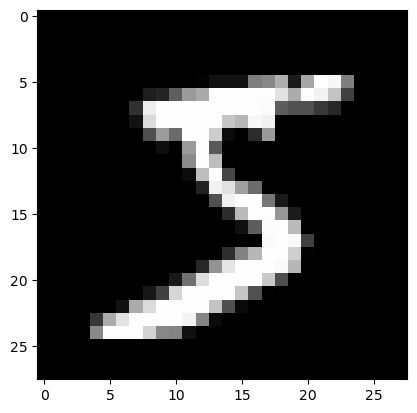

In [2]:
plt.imshow(train_data[0], cmap='gray')

In [3]:
train_data = train_data.reshape(60000, 28 * 28) / 255.0
test_data = test_data.reshape(10000, 28 * 28) / 255.0

In [4]:
train_label = utils.to_categorical(train_label)
test_label = utils.to_categorical(test_label)

In [5]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [ ]:
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X,W1))

In [ ]:
W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1,W2))

In [ ]:
W3 = tf.Variable(tf.random_normal([256,10], stddev=0.01))
model = tf.matmul(L2, W3)

In [ ]:
cost = tf.losses.softmax_cross_entropy(Y, model)
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [ ]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [ ]:
batch_size = 100
total_batch = int(len(train_data) / batch_size)
print(total_batch)

In [ ]:
for epoch in range(15):
    total_cost = 0
    batch_idx = 0
    for i in range(total_batch):
        batch_x = train_data[batch_idx : batch_idx + batch_size]
        batch_y = train_label[batch_idx : batch_idx + batch_size]
        
        sess.run(optimizer,feed_dict={X: batch_x, Y: batch_y})
        
        batch_cost = sess.run(cost, feed_dict={X: batch_x, Y: batch_y})
        total_cost = total_cost + batch_cost
        
        batch_idx += batch_size
    
    training_cost = total_cost / total_batch
    
    test_cost = sess.run(cost, feed_dict={X: test_data, Y: test_label})
    
    print('Epoch: {}'.format(epoch + 1), 
          '|| Avg. Training cost = {:.3f}'.format(training_cost), 
          '|| Current Test cost = {:.3f}'.format(test_cost))

print('Learning process is completed!')

In [ ]:
sess.close()

In [ ]:
test_data[0:1, :].shape

In [ ]:
sess.run(tf.arg_max(model, 1),feed_dict={X: test_data[0:1, :]})

In [ ]:
sess.run(tf.argmax(Y, 1), feed_dict={Y: test_label[0:1, :]})

In [ ]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

print('정확도 :', sess.run(accuracy, feed_dict={X: test_data, Y: test_label}))

In [6]:
keep_prob = tf.placeholder(tf.float32)

In [7]:
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X,W1))
L1 = tf.nn.dropout(L1, keep_prob)

In [8]:
W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1,W2))
L2 = tf.nn.dropout(L2, keep_prob)

In [9]:
W3 = tf.Variable(tf.random_normal([256,10], stddev=0.01))
model = tf.matmul(L2, W3)

In [10]:
cost = tf.losses.softmax_cross_entropy(Y, model)
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [11]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [12]:
batch_size = 100
total_batch = int(len(train_data) / batch_size)
print(total_batch)

600


In [14]:
for epoch in range(15):
    total_cost = 0
    batch_idx = 0
    for i in range(total_batch):
        batch_x = train_data[ batch_idx : batch_idx + batch_size ]
        batch_y = train_label[ batch_idx : batch_idx + batch_size ]
        
        sess.run(optimizer, feed_dict={X: batch_x, Y: batch_y, keep_prob: 0.8}) 
        batch_cost = sess.run(cost, feed_dict={X: batch_x, Y: batch_y, keep_prob: 0.8})
        
        total_cost = total_cost + batch_cost
        
        batch_idx += batch_size
    
    
    training_cost = total_cost / total_batch
    
    
    print('Epoch: {}'.format(epoch + 1), 
          '|| Avg. Training cost = {:.3f}'.format(training_cost))

print('Learning process is completed!')

Epoch: 1 || Avg. Training cost = 0.153
Epoch: 2 || Avg. Training cost = 0.104
Epoch: 3 || Avg. Training cost = 0.078
Epoch: 4 || Avg. Training cost = 0.062
Epoch: 5 || Avg. Training cost = 0.052
Epoch: 6 || Avg. Training cost = 0.044
Epoch: 7 || Avg. Training cost = 0.039
Epoch: 8 || Avg. Training cost = 0.036
Epoch: 9 || Avg. Training cost = 0.030
Epoch: 10 || Avg. Training cost = 0.027
Epoch: 11 || Avg. Training cost = 0.027
Epoch: 12 || Avg. Training cost = 0.025
Epoch: 13 || Avg. Training cost = 0.022
Epoch: 14 || Avg. Training cost = 0.020
Epoch: 15 || Avg. Training cost = 0.021
Learning process is completed!
